# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.382456e+01     1.546569e+01
 * time: 0.002769947052001953
     1     6.260041e+01     1.051741e+01
 * time: 0.008428096771240234
     2     5.585532e+01     1.313640e+01
 * time: 0.021548032760620117
     3     4.111074e+01     9.075045e+00
 * time: 0.03977704048156738
     4     3.091828e+01     7.425065e+00
 * time: 0.058320045471191406
     5     2.736062e+01     6.724252e+00
 * time: 0.07400989532470703
     6     1.275943e+01     2.244856e+00
 * time: 0.14354991912841797
     7     1.181656e+01     4.730430e+00
 * time: 0.15408086776733398
     8     1.035807e+01     3.222500e+00
 * time: 0.16715192794799805
     9     9.004816e+00     4.540156e+00
 * time: 0.18022608757019043
    10     8.103439e+00     3.915868e+00
 * time: 0.1933300495147705
    11     7.300664e+00     3.660659e+00
 * time: 0.2037220001220703
    12     6.713979e+00     3.047220e+00
 * time: 0.21431303024291992
    13     6.385293e+00     2.145972e+00
 * tim

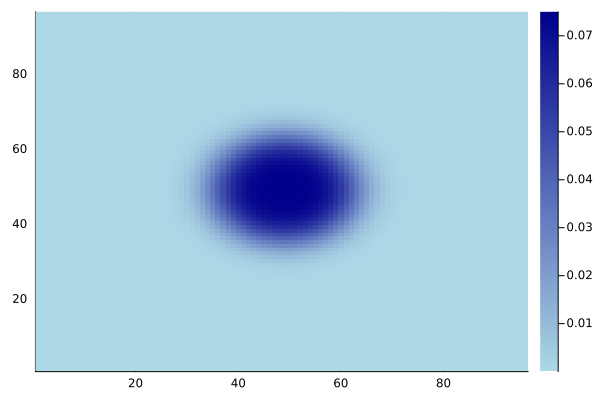

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)